<a href="https://colab.research.google.com/github/SANGSEOSEO/philosophy_datascience/blob/master/%EA%B5%AD%EB%AF%BC%EC%97%B0%EA%B8%88%EC%9D%84_%ED%86%B5%ED%95%B4_%EB%B3%B8_COVID19%EC%97%90%EC%84%9C%EC%9D%98_%EC%9A%B0%EB%A6%AC%EA%B2%BD%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 국민연금을 통해 본 COVID19에서의 우리 기업의 업종별 상황

- 데이터셋: 공공 데이터 포털
- 형태: 파일데이터 (csv)
- 다운로드: https://www.data.go.kr/data/3046071/fileData.do

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = (12, 9)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv('/content/sample_data/national_pension_20200824.csv', encoding='CP949')
df.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1:등록2:탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1:법인2:개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준))',
       ' 신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

In [6]:
# rename으로 하기엔 많아서 컬럼명 간소화시킴
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', 
           '적용일', '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실',
          ]

df.columns = columns          

In [7]:
# IT업종
df_IT = df[df['업종코드'].isin([biz for biz in df['업종코드'] if str(biz).startswith('72') | str(biz).startswith('64')])]
df_IT.columns = columns
df_IT = df_IT[['자료생성년월', '사업장명', '사업장형태', '업종코드명', '적용일', '탈퇴일', '가입상태', '신규', '상실', '가입자수', '고지금액']]



##1. 컬럼의 정리가 필요함.

In [ ]:
# 대략적인 컬럼을 보고 
df.info()

In [5]:
df.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1:등록2:탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1:법인2:개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준))',
       ' 신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

In [ ]:
df.loc[df['업종코드명'].isna()]
df.loc[df['고지금액'].isnull()]

##분석하고자 하는 대상에 되는 데이터 정의 및 추출 

In [ ]:
# 일반 for..loop
# for biz in df['업종코드']:
#   if str(biz).startswith('940'):
#     print(biz)

In [8]:
# 1.분석하고자 하는 대상건 DataFrame생성 

#1.1 대면서비스 업종 
# 이용업,미용,마사지,욕탕,세탁,장례식,결혼,상담
df_uncontact = df[(df['업종코드'].isin([biz for biz in df['업종코드'] if str(biz).startswith('940') 
                                                                         | str(biz).startswith('92') 
                                                                         | str(biz).startswith('93')
                                                                         | str(biz).startswith('80')
                                                                         | str(biz).startswith('73')
                                                                         | str(biz).startswith('74')
                                                                         | str(biz).startswith('63')
                                                                         | str(biz).startswith('71')
                                                                          | str(biz).startswith('551')  
                                                                          | str(biz).startswith('552')  
                                                                          | str(biz).startswith('60') 
                                                                         | str(biz).startswith('61')
                                                                         | str(biz).startswith('62')
                                                                        | str(biz).startswith('52')
                                                                         ]))]


# # 부동산관련 
# df_realest = df[(df['업종코드'].isin([biz for biz in df['업종코드'] if str(biz).startswith('65') 
#                                                                         | str(biz).startswith('66') 
#                                                                         | str(biz).startswith('67')
#                                                                         | str(biz).startswith('70')
#                                                                         ]))]
# df_realest[['자료생성년월', '사업장명', '사업장형태', '업종코드명', '적용일', '탈퇴일', '가입상태', '신규', '상실', '가입자수', '고지금액']].sort_values(by='상실', ascending=False)

## 대면서비스가 중심인 업종

### 비대면서비스 업종 - 상실

In [9]:
df_uncontact['인당고지금액'] = df_uncontact['고지금액'] / df_uncontact['가입자수']
df_uncontact['평균월급'] = df_uncontact['고지금액'] / 9 * 100
df_uncontact['평균연봉'] = df_uncontact['평균월급'] * 12

In [15]:
ds_uncnt = df_uncontact[['자료생성년월', '사업장명', '사업장형태', '업종코드명', '적용일', '탈퇴일', '가입상태', '신규', '상실', '가입자수', '고지금액']].sort_values(by='상실', ascending=False).head(20)

<Figure size 720x504 with 0 Axes>

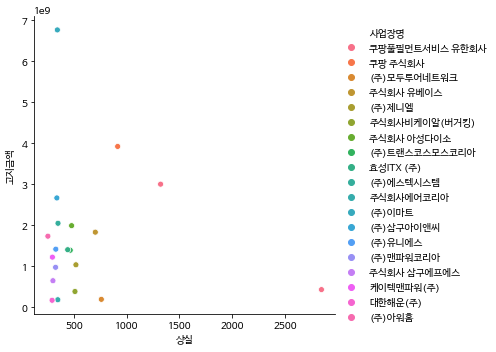

In [16]:
plt.figure(figsize=(10, 7))
sns.relplot(x='상실', y='고지금액', data=ds_uncnt, hue='사업장명')
plt.show()

- 쿠팡 풀필먼트서비스 유한회사를 제외하면 여행사의 타격이 가장 큰것으로 나옵니다. 
- 쿠팡의 경우는 풀필먼트 서비스 유한회사 설립으로 인해 기존 고용의 퇴직과 재취득이 이루어지지 않나 하는 추론이 가능하다.
- (주)모두투어 네트워크와 버거킹

###비대면서비스 - 신규

In [22]:
ds_uncntN = df_uncontact[['자료생성년월', '사업장명', '사업장형태', '업종코드명', '적용일', '탈퇴일', '가입상태', '신규', '상실', '가입자수', '고지금액']].sort_values(by='신규', ascending=False).head(20)

<Figure size 720x504 with 0 Axes>

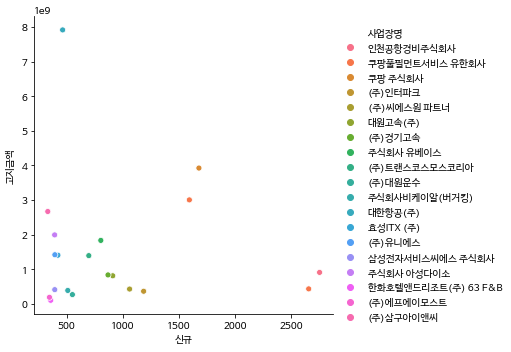

In [23]:
plt.figure(figsize=(10, 7))
sns.relplot(x='신규', y='고지금액', data=ds_uncntN, hue='사업장명')
plt.show()

- 인천공항경비의 임시직의 정규직 전환으로 1위 인점이 눈에 띔
- 아성 다이소의 경우의 신규와 상실의 비율이 비슷하게 이루어지는 것으로 보아 노동의 강도가 셀것으로 추론을 할수 있음.

In [19]:
df_IT['사업장명'] = df_IT['사업장명'].apply(text_preprocess)

## 신규 DataFrame컬럼 설정 

In [28]:
df_main = df[['사업장명', '가입자수', '신규', '상실', '고지금액']]

##월급, 연봉 추정

In [20]:
df['인당고지금액'] = df['고지금액'] / df['가입자수']
df_IT['인당고지금액'] = df['고지금액'] / df['가입자수']

## 데이터에 대한  통계치 확인

In [ ]:
df_IT.describe()

In [ ]:
df_IT.info()

In [ ]:
df_IT['상실'].mean(), df_IT['신규'].mean(), df_IT['가입자수'].mean(), df_IT['고지금액'].mean()

##IT기업의 COVID19에서의 경영상황

##통계정보

In [ ]:
# 총 24070개 
df_IT['사업장명'].value_counts()
df_IT.head()

In [ ]:
df_IT.groupby(by=['신규']).mean()

In [ ]:
df_IT.describe()

In [ ]:
df_IT['신규'].mean()

In [ ]:
df_IT['상실'].mean()

In [ ]:
df_IT['가입자수'].mean()

In [ ]:
df_IT['고지금액'].mean()

In [107]:
df_IT[['사업장명', '가입자수', '신규', '상실', '고지금액', '인당고지금액']].head()

,사업장명,가입자수,신규,상실,고지금액,인당고지금액
135,대신정보통신(주),555,12,17,179306000,323073.87
199,(주)비트컴퓨터,137,1,3,41544740,303246.28
212,한국후지쯔(주),181,1,1,76397920,422087.96
678,(주)제이.티.에스,7,0,0,1875040,267862.86
684,(주)코스콤,744,8,2,332258180,446583.58


**국민연금 정보로 어떻게 연봉정보를 계산하나요?**


국민연금 보험률은 9%입니다. 쉽게 이야기 하면 급여(신고소득월액)의 9%를 국민연금으로 내는 것입니다. 

하지만 이를 절반으로 나누어 **4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조**입니다. 회사는 급여 외에 추가로 금액을 부담합니다.

국민연금 보험료는 **소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과**됩니다.

이를 역산하면 신고소득월액의 계산이 가능합니다. 하지만 **상한선과 하한선이 설정되어 있어 실제보다 과소계산**될 수 있습니다

[수식]

- 임직원 평균 월급 = 인당고지금액 / 9% * 100%
- 임직원 평균 연봉 = 임직원 평균 월급 * 12개월

In [21]:
df_IT['평균월급'] = df_IT['인당고지금액'] / 9 * 100
df['평균월급'] = df['인당고지금액'] / 9 * 100

In [22]:
df_IT['평균연봉'] = df_IT['평균월급'] * 12
df['평균연봉'] = df['평균월급'] * 12

In [23]:
df_IT['평균월급'].notnull().sum()

3710

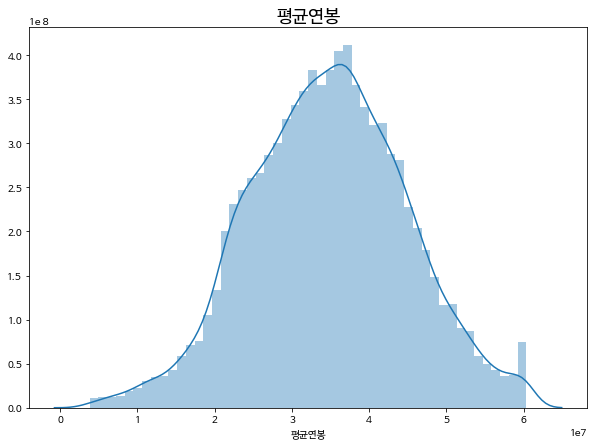

In [121]:
plt.figure(figsize=(10, 7))
sns.distplot(df_IT.loc[df_IT['평균연봉'].notnull(), '평균연봉'])
plt.title('평균연봉', fontsize=18)
plt.show()

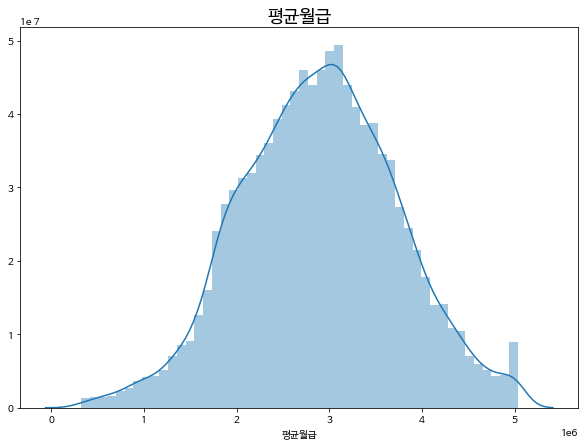

In [122]:
plt.figure(figsize=(10, 7))
sns.distplot(df_IT.loc[df_IT['평균월급'].notnull(), '평균월급'])
plt.title('평균월급', fontsize=18)
plt.show()

## 정렬(Order)

###IT업종 연봉 King!

In [ ]:
# 가입자수를 정렬하면 자동적으로 연봉킹이 나오지.
df_IT.sort_values(by='가입자수' , ascending=False)

### IT업종 신규 채용 King!

In [ ]:
# Top 10
df_hire= df_IT.sort_values(by='신규', ascending=False).head(n=10)

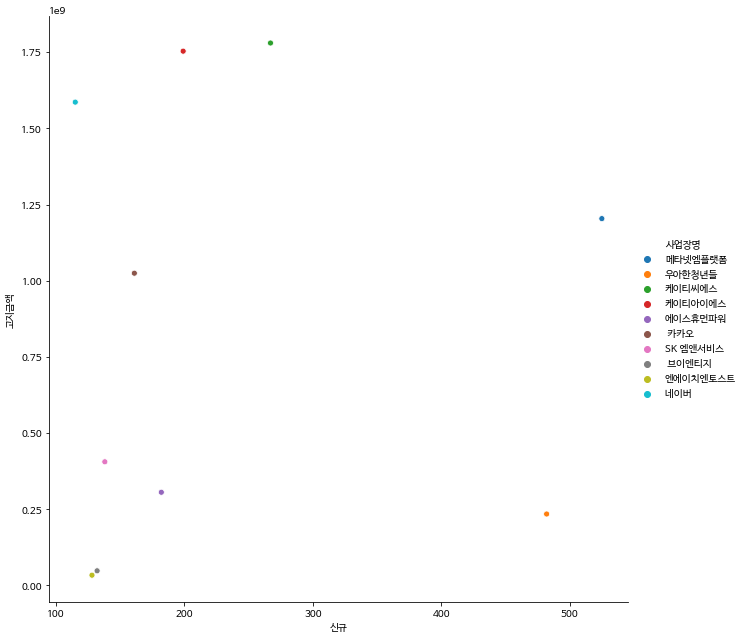

In [44]:
# 네이버가 다른 사업장에 비해 신규 채용인원은 적지만 급여수준은 높은 것을 알수 있다.
# 반면 배달의 민족으로 대표되는 우아한 청년들이 경우엔 신규 채용인원은 많지만 고지금액은 많지 않은것으로 봐서
# 급여수준이 좀 낮는 부분에 채용이 집중되지 않았을까하는 추론을 하게됨.
plt.rcParams['figure.figsize'] = (12, 9)
sns.relplot(x='신규', y='고지금액', data=df_hire, hue='사업장명', height=9)
plt.show()

###IT업종 상실 King!

In [25]:
# 네입버웹툰컴퍼니가 `국민연금 상실`이 top으로 올라와있는데 네이버에서 웹툰 분사는 2020년 8월1일부로 
# 분사하여 대규모 퇴사 및 입사가 이루어진것으로 확인됨.
# Top 10
df_laidoff = df_IT.sort_values(by='상실', ascending=False).head(10)

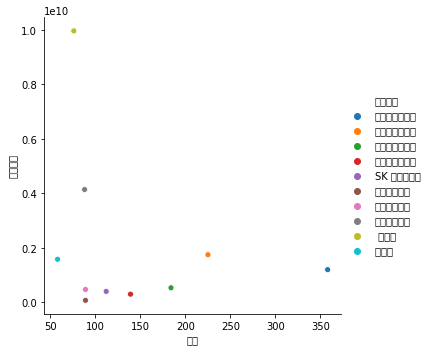

In [27]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.relplot(x='상실', y='고지금액', data=df_laidoff, hue='사업장명', height=5)
plt.show()

## 110인 이하 기업

In [ ]:
people_limit = 110

In [ ]:
small = df_IT.loc[(df_IT['가입자수'].notnull()) & (df_IT['가입자수'] < people_limit )].sort_values(by='가입자수', ascending=False)
small.head(n=20)

## 300인 이상 기업

In [ ]:
big = 300

In [ ]:
# 300인 이상의 기업
big_company = df_IT.loc[(df_IT['가입자수'].notnull()) & (df_IT['가입자수'] >= big )].sort_values(by='가입자수', ascending=False)
big_company.head()

In [ ]:
small['가입자수'].isnull().sum()

In [54]:
!sudo apt-get install -y fonts-nanum  # 한글 폰트 실행
!sudo fc-cache -fv  # 나눔폰트
!rm ~/.cache/matplotlib -rf  # 캐쉬 삭제

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,030 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and d

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')   # 시스템 설정 : 폰트 패밀리 - 나눔바른폰트 

In [ ]:
plt.figure(figsize=(10, 7))
sns.distplot(small['가입자수'])
plt.title('가입자', fontsize=18)
plt.show()

In [ ]:
small.sort_values(by='상실', ascending=False)

## 사업장명 데이터 정제 (Cleansing)

In [17]:
import re

# 괄호안 문자열 제거
pattern_1 = '\(.*\)'
pattern_2 = '\（.*\）'
pattern_3 = '주식회사'



### (주), (주식회사) 문자열 제거

In [ ]:
re.sub(pattern_1, '', '브레인크루(주)')

In [ ]:
re.sub(pattern_1, '', '브레인크루(주식회사)')

In [ ]:
re.sub(pattern_1, '', '(주)브레인크루')

In [ ]:
re.sub(pattern_2, '', '（주）타워홀딩스')

### 주식회사 문자열 제거

In [ ]:
re.sub(pattern_2, '', '브레인크루 주식회사')

In [ ]:
re.sub(pattern_2, '', '브레인크루주식회사')

In [ ]:
re.sub(pattern_2, '', '주식회사브레인크루주식회사')

In [18]:
def text_preprocess(text):
    text = re.sub(pattern_1, '', text)
    text = re.sub(pattern_2, '', text)
    text = re.sub(pattern_3, '', text)
    return text

In [ ]:
df_main['사업장명'] = df_main['사업장명'].apply(text_preprocess)

In [ ]:
df_main[df_main['사업장명'] == '패스트캠퍼스']

In [ ]:
df['사업장명'] = df['사업장명'].apply(text_preprocess)

In [ ]:
df.columns

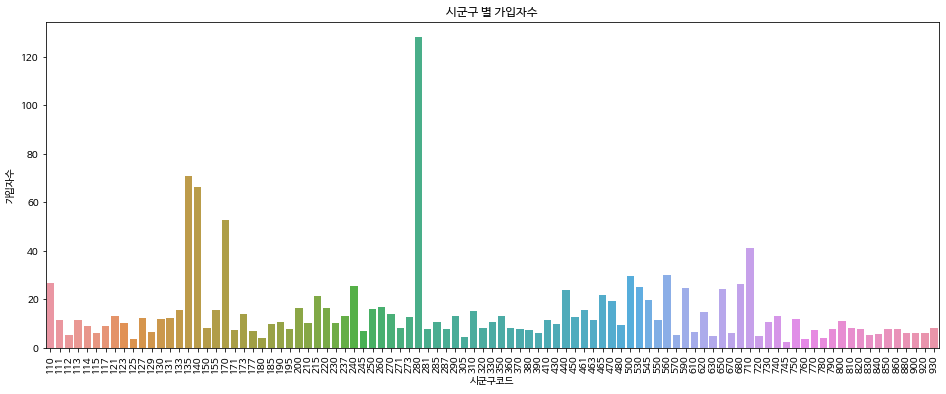

In [54]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_IT.groupby('시군구코드')['가입자수'].mean().index, y=df_IT.groupby('시군구코드')['가입자수'].mean())
plt.title('시군구 별 가입자수')
plt.xticks(rotation=90)
plt.show()

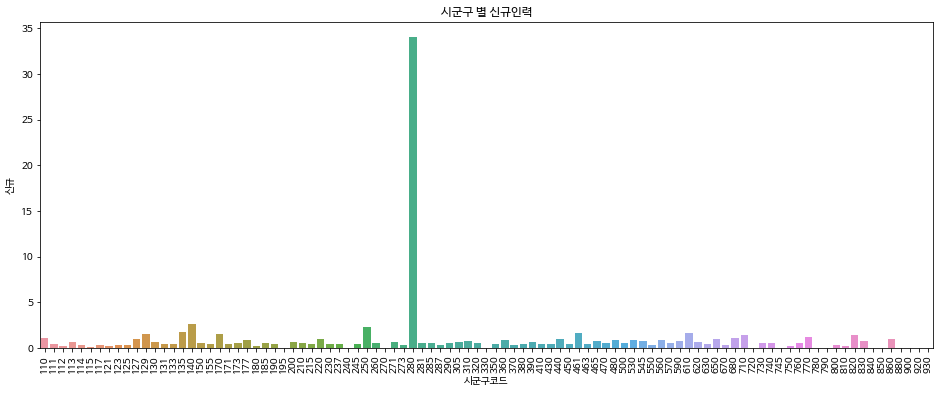

In [56]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_IT.groupby('시군구코드')['신규'].mean().index, y=df_IT.groupby('시군구코드')['신규'].mean())
plt.title('시군구 별 신규인력')
plt.xticks(rotation=90)
plt.show()

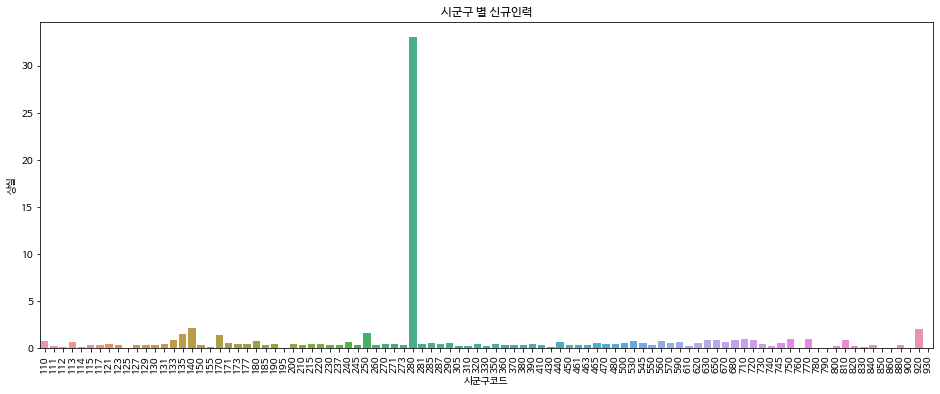

In [49]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_IT.groupby('시군구코드')['상실'].mean().index, y=df_IT.groupby('시군구코드')['상실'].mean())
plt.title('시군구 별 신규인력')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

## 신규 인력이 많은 시군구코드

**경기도 평택시**에서 최근 국민연금 가입자 신규인력이 가장 많이 발생했음

주로 건축 인력 혹은 건설사 인력들이 신규로 편입되면서 국민연금 가입자 발생이 가장 많이 일어난 것으로 집계 됐다.

In [53]:
df.loc[df['시군구코드'] == 280][['사업장명','지번주소','신규']].sort_values(by='신규', ascending=False).head(20)

,사업장명,지번주소,신규
8828,(주)디엠개발,경상북도 문경시 영순면,34
176428,문경시청,경상북도 문경시 모전동,24
514264,에스비서비스매니지먼트,경상북도 문경시 농암면,19
151794,문경오미자밸리영농조합법인,경상북도 문경시 동로면,5
509306,명성종합건설주식회사,경상북도 문경시 공평동,5
488685,(주)세진산업/일용/문경 모전동 주상복합신축공사 중 토공 및 가시설공사,경상북도 문경시 모전동,5
254150,수월한 주식회사,경상북도 문경시 신기동,5
8781,(주)대명화학,경상북도 문경시 산양면,4
420074,우상건설(주)(일용)중부내륙선이천~문경철도건설 제9공구노반신설기타공사,경상북도 문경시 문경읍,4
165019,(의료법인)동춘의료재단문경제일병원,경상북도 문경시 모전동,4


**모두투어네트워크**에서 가장 많은 상실 인력이 발생했다.

스타브벅스커피코리아(주) 및 콜센터 및 상담업체 (주)메낱넷엠플랫폼,(주)삼구아이씨_인력소싱업체 주로 IT업종에서 대면서비스가 이루어지는 업종인 경우에는 실직자가 다량으로 발생한것으로 보인다.

In [57]:
df.loc[df['시군구코드'] == 140][['사업장명','지번주소','상실']].sort_values(by='상실', ascending=False).head(20)

,사업장명,지번주소,상실
4519,(주)모두투어네트워크,서울특별시 중구 을지로1가,760
5288,스타벅스커피코리아(주),서울특별시 중구 소공동,518
7289,(주)메타넷엠플랫폼,서울특별시 중구 충무로2가,358
358,(주)삼구아이앤씨,서울특별시 중구 수표동,338
503301,동구청/경제지원과/방역 및 기타,대구광역시 동구 신암동,236
97612,씨제이제일제당（주）,서울특별시 중구 쌍림동,204
3471,중소기업은행,서울특별시 중구 을지로2가,192
220405,농협은행주식회사,서울특별시 중구 충정로1가,186
61748,(주)한국코퍼레이션,서울특별시 중구 남대문로5가,184
3567,(주)신한은행,서울특별시 중구 태평로2가,171


## IT업종별 신규/상실 인력 현황

In [60]:
df_IT.groupby('업종코드명')['신규'].mean()

업종코드명
공영 우편업                      0.82
그 외 기타 전기 통신업               0.47
그 외 기타 정보 서비스업              0.94
기타 게임 소프트웨어 개발 및 공급업        1.00
기타 정보 기술 및 컴퓨터 운영 관련 서비스업   1.35
뉴스 제공업                      0.67
데이터베이스 및 온라인 정보 제공업         1.72
모바일 게임 소프트웨어 개발 및 공급업       1.41
무선 및 위성 통신업                 4.69
시스템 소프트웨어 개발 및 공급업          0.89
유선 온라인 게임 소프트웨어 개발 및 공급업    3.03
유선 통신업                      0.33
응용 소프트웨어 개발 및 공급업           0.79
자료 처리업                      4.21
컴퓨터 및 주변 기기 수리업             0.92
컴퓨터 시스템 통합 자문 및 구축 서비스업     0.76
컴퓨터 프로그래밍 서비스업              0.77
컴퓨터시설 관리업                   0.86
택배업                         0.44
통신 재판매업                     0.92
포털 및 기타 인터넷 정보 매개 서비스업      0.66
호스팅 및 관련 서비스업               0.00
Name: 신규, dtype: float64

In [61]:
df_1 =df_IT.groupby('업종코드명')['신규'].mean()

In [73]:
df_2 =df_IT.groupby('업종코드명')['상실'].mean()

업종코드명
공영 우편업                      0.94
그 외 기타 전기 통신업               0.44
그 외 기타 정보 서비스업              0.22
기타 게임 소프트웨어 개발 및 공급업        0.55
기타 정보 기술 및 컴퓨터 운영 관련 서비스업   0.59
뉴스 제공업                      0.75
데이터베이스 및 온라인 정보 제공업         1.44
모바일 게임 소프트웨어 개발 및 공급업       0.12
무선 및 위성 통신업                 5.86
시스템 소프트웨어 개발 및 공급업          0.26
유선 온라인 게임 소프트웨어 개발 및 공급업    0.23
유선 통신업                      0.33
응용 소프트웨어 개발 및 공급업           0.62
자료 처리업                      1.99
컴퓨터 및 주변 기기 수리업             1.17
컴퓨터 시스템 통합 자문 및 구축 서비스업     0.48
컴퓨터 프로그래밍 서비스업              0.32
컴퓨터시설 관리업                   0.14
택배업                         0.24
통신 재판매업                     0.99
포털 및 기타 인터넷 정보 매개 서비스업      0.56
호스팅 및 관련 서비스업               0.00
Name: 상실, dtype: float64

In [63]:
df_1.sort_values(ascending=False).count()

22

In [64]:
df_2.sort_values(ascending=False).count()

22

상위 50 개 **업종** 출력하도록 하겠습니다.

In [65]:
df_top100 = df_1.sort_values(ascending=False).head(50)
df_top100

업종코드명
무선 및 위성 통신업                 4.69
자료 처리업                      4.21
유선 온라인 게임 소프트웨어 개발 및 공급업    3.03
데이터베이스 및 온라인 정보 제공업         1.72
모바일 게임 소프트웨어 개발 및 공급업       1.41
기타 정보 기술 및 컴퓨터 운영 관련 서비스업   1.35
기타 게임 소프트웨어 개발 및 공급업        1.00
그 외 기타 정보 서비스업              0.94
컴퓨터 및 주변 기기 수리업             0.92
통신 재판매업                     0.92
시스템 소프트웨어 개발 및 공급업          0.89
컴퓨터시설 관리업                   0.86
공영 우편업                      0.82
응용 소프트웨어 개발 및 공급업           0.79
컴퓨터 프로그래밍 서비스업              0.77
컴퓨터 시스템 통합 자문 및 구축 서비스업     0.76
뉴스 제공업                      0.67
포털 및 기타 인터넷 정보 매개 서비스업      0.66
그 외 기타 전기 통신업               0.47
택배업                         0.44
유선 통신업                      0.33
호스팅 및 관련 서비스업               0.00
Name: 신규, dtype: float64

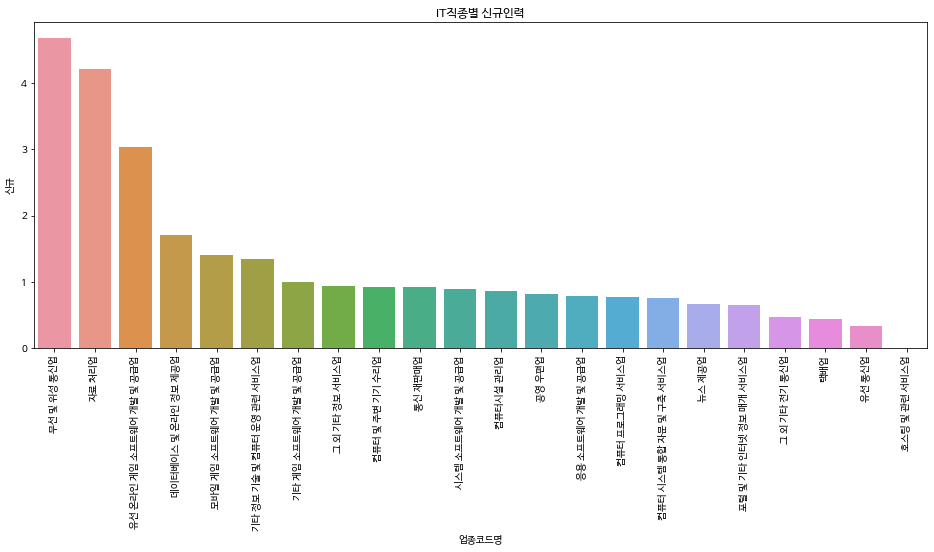

In [66]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_top100.index, y=df_top100)
plt.title('IT직종별 신규인력')
plt.xticks(rotation=90)
plt.show()

- 전반적으로 IT업종도 채용이 `**전반적으로 흐림**`이라는 표현이 적절해 보임.
- 신규채용인력이 비대면으로 이루어지는 분야에 집중되어 있는 부분도 눈에 보인다.(무선및 위성통신업, 자료처리업,게임개발)
- 택배업도 상위 50에 들어있는것이 확인

In [68]:
df_2 = df_IT.groupby('업종코드명')['상실'].mean()

In [72]:
df_bot100 = df_2.sort_values(ascending=False).head(50)


업종코드명
무선 및 위성 통신업                 5.86
자료 처리업                      1.99
데이터베이스 및 온라인 정보 제공업         1.44
컴퓨터 및 주변 기기 수리업             1.17
통신 재판매업                     0.99
공영 우편업                      0.94
뉴스 제공업                      0.75
응용 소프트웨어 개발 및 공급업           0.62
기타 정보 기술 및 컴퓨터 운영 관련 서비스업   0.59
포털 및 기타 인터넷 정보 매개 서비스업      0.56
기타 게임 소프트웨어 개발 및 공급업        0.55
컴퓨터 시스템 통합 자문 및 구축 서비스업     0.48
그 외 기타 전기 통신업               0.44
유선 통신업                      0.33
컴퓨터 프로그래밍 서비스업              0.32
시스템 소프트웨어 개발 및 공급업          0.26
택배업                         0.24
유선 온라인 게임 소프트웨어 개발 및 공급업    0.23
그 외 기타 정보 서비스업              0.22
컴퓨터시설 관리업                   0.14
모바일 게임 소프트웨어 개발 및 공급업       0.12
호스팅 및 관련 서비스업               0.00
Name: 상실, dtype: float64

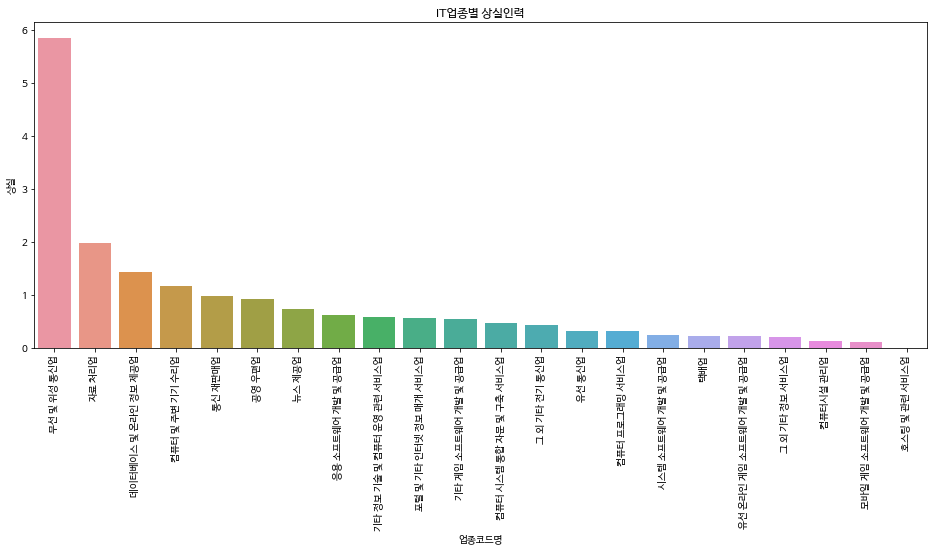

In [70]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_bot100.index, y=df_bot100)
plt.title('IT업종별 상실인력')
plt.xticks(rotation=90)
plt.show()

업종별 상실 인력에 대한 **TOP 50 결과**입니다.

- 유선온라인 게임 소프트웨어개발 및 공급업의 경우엔 ,신규고용 창출에 비해 상실의 수치는 크지 않은것으로 보임
- 신규고용 창출의 top인 무선 및 위성통신업종의 경우엔, 특이하게도 상실의 경우에도 Top임
  - 유무선 기지국 건설 혹은 통신회선 설치로 인한 국민 연금 신규 및 상실이 대량으로 반복되는 구조인것으로 판단됨.

In [92]:
df_IT.loc[df_IT['업종코드']=='642001',['사업장명', '업종코드명', '신규', '상실', '고지금액', '인당고지금액']]

,사업장명,업종코드명,신규,상실,고지금액,인당고지금액
3479,케이티,무선 및 위성 통신업,15,76,9961182900,442188.61
3481,에스케이텔레콤,무선 및 위성 통신업,43,37,2400608900,440721.30
3579,케이티파워텔,무선 및 위성 통신업,1,0,63229120,448433.48
3932,케이디디아이코리아,무선 및 위성 통신업,3,1,20392060,351587.24
4451,케이티링커스,무선 및 위성 통신업,4,7,163318140,384277.98
4943,에스케이텔링크,무선 및 위성 통신업,0,0,91486520,444109.32
12843,케이티아이에스,무선 및 위성 통신업,199,225,1753229620,221955.90
13715,온산,무선 및 위성 통신업,0,0,2217960,277245.00
14747,인터콜,무선 및 위성 통신업,0,0,2591520,185108.57
22185,굿텔레콤,무선 및 위성 통신업,1,0,2326820,258535.56


## 업종별 단일 회사 연봉 비교 차트 그리기

In [ ]:
code = df[df['사업장명']== '다인커머스']['업종코드']
cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실', '업종코드']
for v in code.item():
  print(v,end='')


filtered = df.loc[df['업종코드']=='642001'][cols]

df_company = df.loc[df['사업장명'] == '다인커머스'][cols]
filtered.mean()
df_company = df_company.append(pd.Series(filtered.mean()), ignore_index=True)
df_company

In [29]:
def compare_and_visualize(company):
    code = df[df['사업장명'] == company]['업종코드']
    cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실', '업종코드']
    
    # 가져오고자 하는 정보 
    filtered = df.loc[df['업종코드']==code.item()][cols]
    df_company = df.loc[df['사업장명'] == company][cols]

    df_company = df_company.append(pd.Series(filtered.mean()), ignore_index=True)
    
    compare_cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실']
    for col in compare_cols:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=[company, '업종평균'], y=col, data=df_company)
        plt.title('{} vs 업종평균'.format(col), fontsize=18)
        plt.show()

In [ ]:
compare_and_visualize('인밸류비즈')

## 국민연금 상실/취득으로 본 업종별 경제상황